# Data Cleaning

Data cleaning” (ou limpeza de dados) é uma das etapas mais importantes em qualquer projeto de Data Science / Machine Learning, porque garante que os dados que você usa sejam consistentes, completos e confiáveis.
O objetivo é mostrar a importancia de tratar e limpar a base antes de colocar em um modelo. Abaixo tem um arquivo .csv "tempo" onde irei tratar ate apto para nosso objetivo principal. Vale ressaltar que é um arquivo exemplo.


# - Analise exploratoria

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
# import data
dataset = pd.read_csv("tempo.csv", sep=";")

#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
dataset.shape

(14, 5)

 A base tem que respeitar as seguintes inforamçoes:

 - Aparência: sol, nublado, chuva
 - Temperatura: -135 ~ 130 F
 - Umidade: 0 ~ 100
 - Jogar: sim/nao
 - Tratar valores NAs

In [ ]:
dataset.groupby(['Aparencia']).size()
# primeiro erro encontrado

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


In [ ]:
#primeiro vamos corrigir esse erro 'menos' que nao era para estar aparecedo na nossa base de dados

dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
dataset.groupby(['Aparencia']).size()

,0
Aparencia,
chuva,6
nublado,3
sol,5


In [ ]:
agrupado_vento= dataset.groupby(['Vento']).size()
agrupado_vento
#percebemos que existe um valor faltante, visto que a base de dados tem 14 linhas

,0
Vento,
FALSO,7
VERDADEIRO,6


In [ ]:
agrupado_jogar = dataset.groupby(['Jogar']).size()
agrupado_jogar
# aqui parece estar tudo normal

,0
Jogar,
nao,5
sim,9


In [ ]:
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


In [ ]:
# resolveremos agora o problema do valor NAN apresentado na coluna Vento

dataset['Vento'].fillna('FALSO', inplace=True)
dataset.isnull().sum()

/tmp/ipython-input-723811957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Vento'].fillna('FALSO', inplace=True)


,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,0
Jogar,0


In [ ]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
dataset['Temperatura'].describe()

,Temperatura
count,14.000000
mean,155.571429
std,306.433759
min,64.000000
25%,69.250000
50%,73.500000
75%,80.750000
max,1220.000000


Text(0.5, 1.0, 'Score')

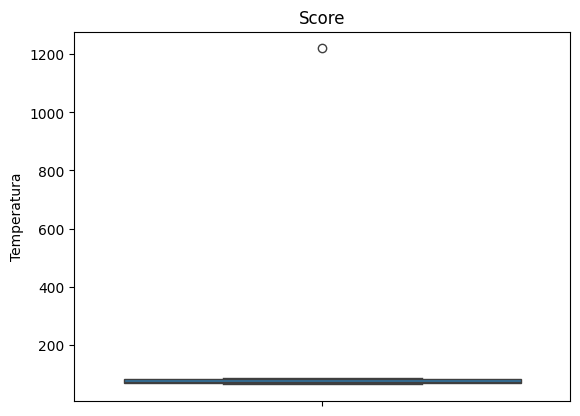

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Score')

In [ ]:
dataset.loc[(dataset['Temperatura'] <  -135 )  | ( dataset['Temperatura'] >  130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
mediana_Temperatura = sts.median(dataset['Temperatura'])
mediana_Temperatura

73.5

In [ ]:
dataset.loc[dataset['Temperatura'] == 1220, 'Temperatura'] = mediana_Temperatura

/tmp/ipython-input-773118509.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Temperatura'] == 1220, 'Temperatura'] = mediana_Temperatura


In [ ]:
dataset.loc[(dataset['Temperatura'] <  -135 )  | ( dataset['Temperatura'] >  130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [ ]:
mediana_Umidade = sts.median(dataset['Umidade'])
mediana_Umidade

85.5

In [ ]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana_Umidade

In [ ]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
dataset['Umidade'].fillna(mediana_Umidade, inplace=True)

/tmp/ipython-input-331830642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana_Umidade, inplace=True)


In [ ]:
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,0
Vento,0
Jogar,0
